# Task

As a homework assignment, you are tasked with creating a neural network using Keras mechanisms that will classify items from the Fashion MNIST dataset.

Unlike the previous task, you are encouraged to design a convolutional neural network. Choose the architecture of the network and train it on the Fashion MNIST dataset. Try to achieve the highest possible classification accuracy by manipulating the network parameters. Compare the accuracy of the obtained convolutional network with the accuracy of the multilayer network from the previous task. Draw conclusions based on the comparison.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

Epoch 1/10
1875/1875 [==============================] - 64s 33ms/step - loss: 0.4930 - accuracy: 0.8180 - val_loss: 0.3852 - val_accuracy: 0.8600
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3212 - accuracy: 0.8825 - val_loss: 0.3139 - val_accuracy: 0.8880
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2732 - accuracy: 0.8993 - val_loss: 0.2898 - val_accuracy: 0.8964
Epoch 4/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2442 - accuracy: 0.9102 - val_loss: 0.2772 - val_accuracy: 0.9014
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2180 - accuracy: 0.9195 - val_loss: 0.2680 - val_accuracy: 0.9030
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1986 - accuracy: 0.9254 - val_loss: 0.3120 - val_accuracy: 0.8847
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1809 - accuracy: 0.9321 - val_loss: 0.2652 -

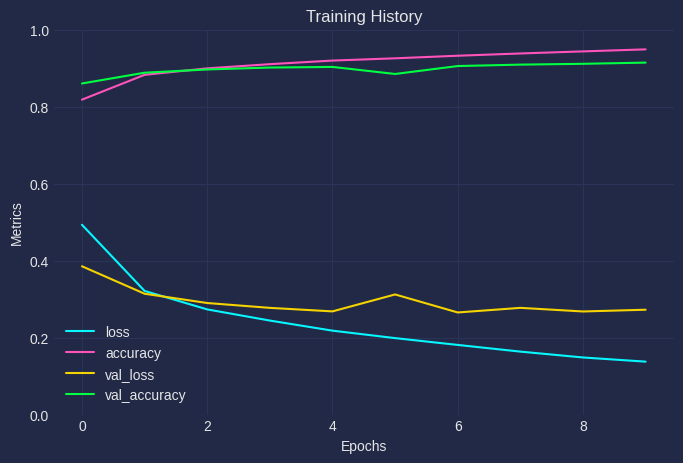

313/313 [==============================] - 3s 9ms/step - loss: 0.2724 - accuracy: 0.9142
Test accuracy: 0.9142000079154968
313/313 [==============================] - 3s 10ms/step


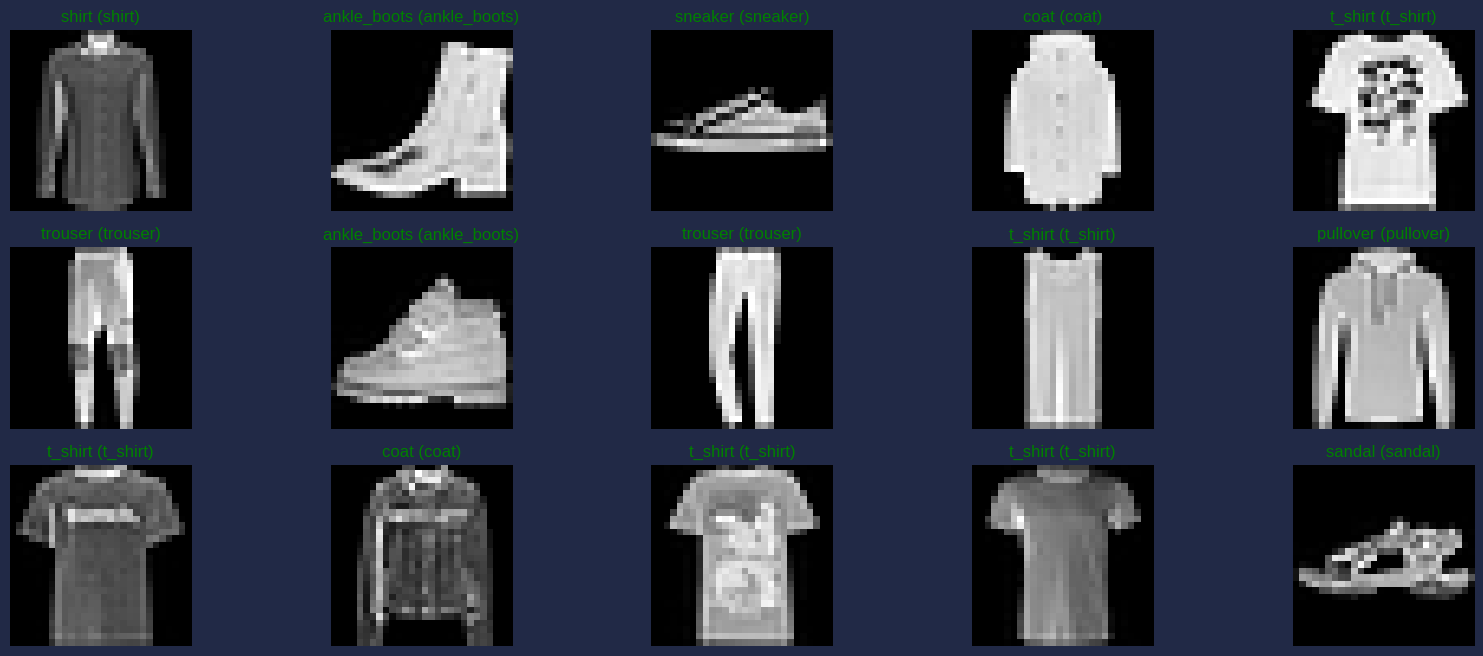

In [5]:
# Load and prepare the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create a convolutional neural network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.show()

# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Visualization of random predictions
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
                         'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(test_images)
test_images = test_images.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[index]), cmap='gray')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(test_labels[index])
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                 color=("green" if predict_index == true_index else "red"))

plt.show()


## __Conclusion:__

Comparing the two models based on their training results, the following conclusions can be drawn:

**Convolutional Neural Network Model:**
- **Test Accuracy:** 91.42%
- **Training Process:** The model shows a gradual improvement in accuracy on both the training and validation datasets over 10 epochs.
- **Risk of Overfitting:** On the accuracy and loss plots, it is observed that the validation accuracy plateaus, indicating a potential onset of overfitting.

**Fully Connected Neural Network Model:**
- **Test Accuracy:** 90.08%
- **Training Process:** The model also demonstrates an improvement in accuracy over 50 epochs, but the training process takes longer.
- **Risk of Overfitting:** A similar plateau in validation accuracy is observed, suggesting a risk of overfitting, but the overall trend towards improvement is maintained.

**Comparison:**
- Both models achieved good results on the test data, with accuracy close to 90%.
- The Convolutional Neural Network was trained for only 10 epochs, whereas the Fully Connected Neural Network required 50 epochs to achieve similar accuracy.
- Both models may face a risk of overfitting, and it is recommended to use regularization methods to prevent overfitting.

**Conclusion:**
Both models show promise, and the choice between them may depend on the specific requirements of the task and the available training resources. Convolutional Neural Networks are generally effective for image processing, maintaining a simple architecture, while Fully Connected Neural Networks might require more computational resources but can also be trained on various types of data.